# Project 03 - Titanic Classifier

**Author:** Womenker Karto
**Date:** 2025-11-01

## Introduction
This project explores classification models to predict Titanic passenger survival using three models: Decision Tree, Support Vector Machine (SVM), and Neural Network (MLP). Three feature sets are evaluated for model performance. Reflections follow each section.


## 1. Import and Inspect Data

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from matplotlib.colors import ListedColormap

%matplotlib inline

# Load Titanic dataset
titanic = sns.load_dataset('titanic')
# Display a few records to verify
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True



## 2. Data Exploration and Preparation
### 2.1 Handle Missing Values

In [75]:
median_age = titanic['age'].median()
titanic['age'] = titanic['age'].fillna(median_age)

mode_embark = titanic['embark_town'].mode()[0]
titanic['embark_town'] = titanic['embark_town'].fillna(mode_embark)

### 2.2 Feature Engineering

In [76]:
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1
titanic['sex'] = titanic['sex'].map({'male':0, 'female':1})
titanic['embarked'] = titanic['embarked'].map({'C':0, 'Q':1, 'S':2})
titanic['alone'] = titanic['alone'].astype(int)

**Reflection:** Added `family_size` and encoded categorical features numerically to make them suitable for ML models.

## 3. Feature Selection
### 3.1 Cases
- Case 1: `alone`
- Case 2: `age`
- Case 3: `age + family_size`

### 3.2 Define Features (X) and Target (y)

In [77]:
# Case 1
X1 = titanic[['alone']]
y1 = titanic['survived']

# Case 2
X2 = titanic[['age']].dropna()
y2 = titanic.loc[X2.index, 'survived']

# Case 3
X3 = titanic[['age','family_size']].dropna()
y3 = titanic.loc[X3.index,'survived']

### Reflection 3
- Why are these features selected? 
    These features were chosen to explore how social connection and demographic attributes influenced survival outcomes in the Titanic dataset.

    - Case 1 (alone): This feature reflects whether a passenger was traveling alone or with family. Passengers who were not alone might have had better chances of survival due to mutual assistance or group prioritization during rescue.

    - Case 2 (age): Age captures vulnerability and rescue priority. Younger passengers and children were often given priority access to lifeboats, making age an important demographic predictor.

    - Case 3 (age + family_size): This combination tests whether adding a social feature (family size) to a demographic one (age) improves model performance. Larger family groups may have influenced rescue chances both positively (mutual help) or negatively (difficulty coordinating evacuation).
    These cases were designed to progressively add complexity and understand the contribution of individual versus combined factors to survival prediction.
- Are there features likely to be highly predictive of survival?
  Yes. Based on the dataset and historical patterns, “alone” is expected to be a strong indicator — passengers traveling alone often had lower survival rates. Additionally, age is likely predictive since younger individuals and women had higher rescue priority. The combination of age and family_size provides richer information and tends to improve classification accuracy, as it captures both personal vulnerability and social dynamics during the disaster.


## 4. Decision Tree Classifier
### 4.1 Split Data

In [78]:
# Case 1: Feature = alone
splitter1 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx1, test_idx1 in splitter1.split(X1, y1):

    X1_train = X1.iloc[train_idx1]
    X1_test  = X1.iloc[test_idx1]
    y1_train = y1.iloc[train_idx1]
    y1_test  = y1.iloc[test_idx1]

print('Case 1 - Alone:')
print('Train size:', len(X1_train), '| Test size:', len(X1_test))

# Case 2: Feature = age
splitter2 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx2, test_idx2 in splitter2.split(X2, y2):
    X2_train = X2.iloc[train_idx2]
    X2_test  = X2.iloc[test_idx2]
    y2_train = y2.iloc[train_idx2]
    y2_test  = y2.iloc[test_idx2]

print('Case 2 - Age:')
print('Train size:', len(X2_train), '| Test size:', len(X2_test))

# Case 3: Features = age + family_size
splitter3 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx3, test_idx3 in splitter3.split(X3, y3):
    X3_train = X3.iloc[train_idx3]
    X3_test  = X3.iloc[test_idx3]
    y3_train = y3.iloc[train_idx3]
    y3_test  = y3.iloc[test_idx3]

print('Case 3 - Age + Family Size:')
print('Train size:', len(X3_train), '| Test size:', len(X3_test))


Case 1 - Alone:
Train size: 712 | Test size: 179
Case 2 - Age:
Train size: 712 | Test size: 179
Case 3 - Age + Family Size:
Train size: 712 | Test size: 179


### 4.2 Train Model

In [79]:
# CASE 1: Decision Tree using alone
tree_model1 = DecisionTreeClassifier()
tree_model1.fit(X1_train, y1_train)

# CASE 2: Decision Tree using age
tree_model2 = DecisionTreeClassifier()
tree_model2.fit(X2_train, y2_train)

# CASE 3: Decision Tree using age and family_size
tree_model3 = DecisionTreeClassifier()
tree_model3.fit(X3_train, y3_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### 4.3 Evaluate Model

In [80]:
# Predict on training data
y1_pred = tree_model1.predict(X1_train)
print("Results for Decision Tree on training data (Case 1 - alone):")
print(classification_report(y1_train, y1_pred))

# Predict on test data
y1_test_pred = tree_model1.predict(X1_test)
print("Results for Decision Tree on test data (Case 1 - alone):")
print(classification_report(y1_test, y1_test_pred))

Results for Decision Tree on training data (Case 1 - alone):
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       439
           1       0.50      0.51      0.51       273

    accuracy                           0.62       712
   macro avg       0.60      0.60      0.60       712
weighted avg       0.62      0.62      0.62       712

Results for Decision Tree on test data (Case 1 - alone):
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



In [81]:
# Predict on training data
y2_pred = tree_model2.predict(X2_train)
print("Results for Decision Tree on training data (Case 2 - age):")
print(classification_report(y2_train, y2_pred))

# Predict on test data
y2_test_pred = tree_model2.predict(X2_test)
print("Results for Decision Tree on test data (Case 2 - age):")
print(classification_report(y2_test, y2_test_pred))
 

Results for Decision Tree on training data (Case 2 - age):
              precision    recall  f1-score   support

           0       0.68      0.92      0.78       439
           1       0.69      0.29      0.41       273

    accuracy                           0.68       712
   macro avg       0.68      0.61      0.60       712
weighted avg       0.68      0.68      0.64       712

Results for Decision Tree on test data (Case 2 - age):
              precision    recall  f1-score   support

           0       0.63      0.89      0.74       110
           1       0.50      0.17      0.26        69

    accuracy                           0.61       179
   macro avg       0.57      0.53      0.50       179
weighted avg       0.58      0.61      0.55       179



In [82]:
# Predict on training data
y3_pred = tree_model3.predict(X3_train)
print("Results for Decision Tree on training data (Case 3 - age + family_size):")
print(classification_report(y3_train, y3_pred))

# Predict on test data
y3_test_pred = tree_model3.predict(X3_test)
print("Results for Decision Tree on test data (Case 3 - age + family_size):")
print(classification_report(y3_test, y3_test_pred))

Results for Decision Tree on training data (Case 3 - age + family_size):
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       439
           1       0.77      0.56      0.65       273

    accuracy                           0.77       712
   macro avg       0.77      0.73      0.74       712
weighted avg       0.77      0.77      0.76       712

Results for Decision Tree on test data (Case 3 - age + family_size):
              precision    recall  f1-score   support

           0       0.65      0.75      0.69       110
           1       0.46      0.35      0.40        69

    accuracy                           0.59       179
   macro avg       0.55      0.55      0.54       179
weighted avg       0.57      0.59      0.58       179



### 4.4 Confusion Matrix

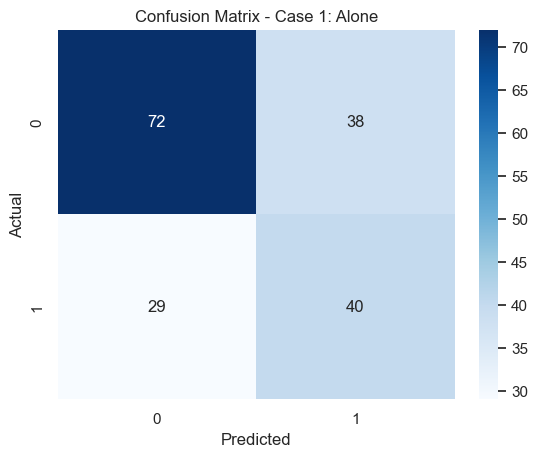

In [83]:
# Create confusion matrix for test predictions (Case 1)
cm1 = confusion_matrix(y1_test, y1_test_pred)

# Plot heatmap
sns.heatmap(cm1, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Case 1: Alone')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

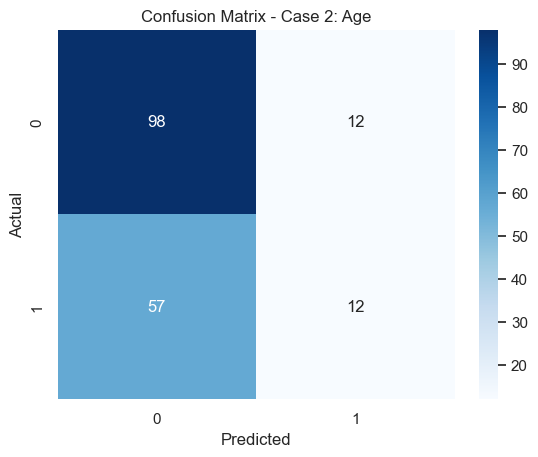

In [84]:
# Create confusion matrix for test predictions (Case 2)
cm2 = confusion_matrix(y2_test, y2_test_pred)

# Plot heatmap
sns.heatmap(cm2, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Case 2: Age')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

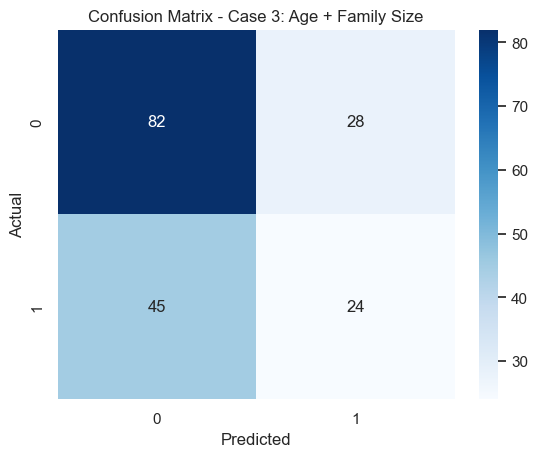

In [85]:
# Create confusion matrix for test predictions (Case 3)
cm3 = confusion_matrix(y3_test, y3_test_pred)

# Plot heatmap
sns.heatmap(cm3, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Case 3: Age + Family Size')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 4.5 Decision Tree Plot

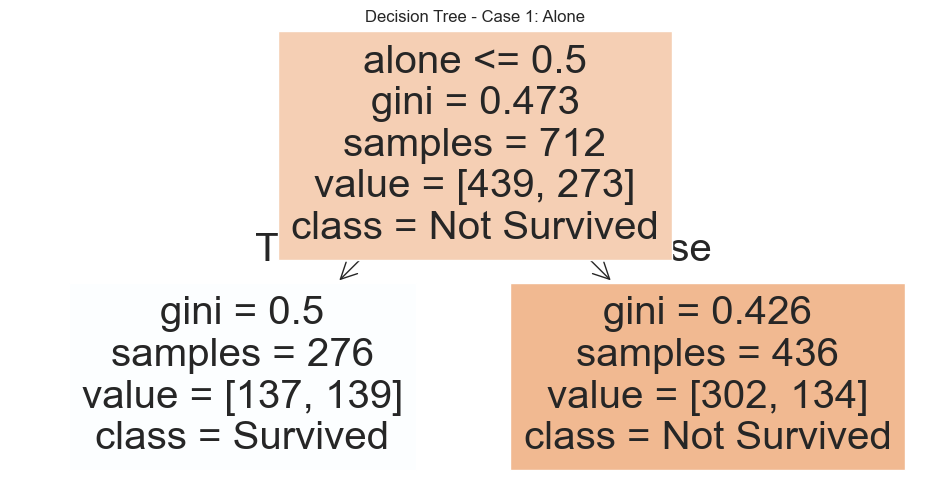

In [86]:
# Plot Decision Tree for Case 1
fig = plt.figure(figsize=(12, 6))
plot_tree(tree_model1,
          feature_names=X1.columns,
          class_names=['Not Survived', 'Survived'],
          filled=True)
plt.title("Decision Tree - Case 1: Alone")
plt.show()

# Save image
fig.savefig("tree_case1_alone.png")

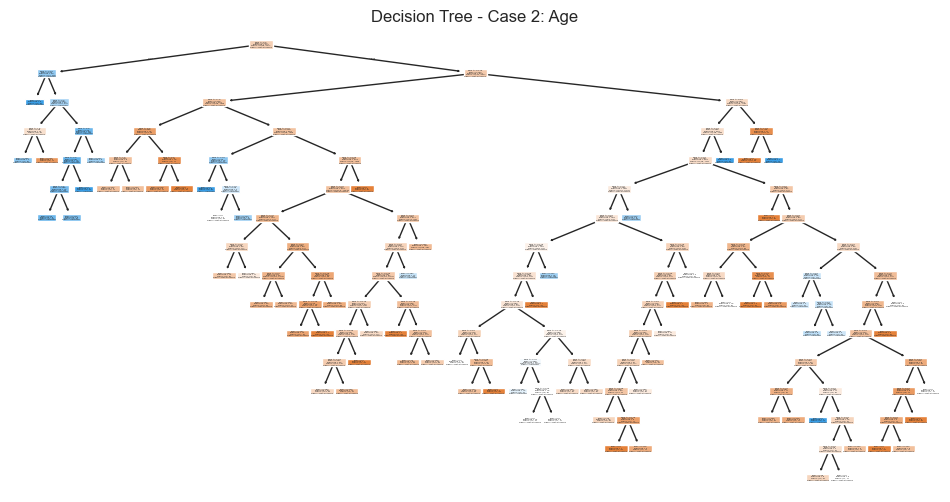

In [87]:
# Plot Decision Tree for Case 2
fig = plt.figure(figsize=(12, 6))
plot_tree(tree_model2,
          feature_names=X2.columns,
          class_names=['Not Survived', 'Survived'],
          filled=True)
plt.title("Decision Tree - Case 2: Age")
plt.show()

# Save image
fig.savefig("tree_case2_age.png")

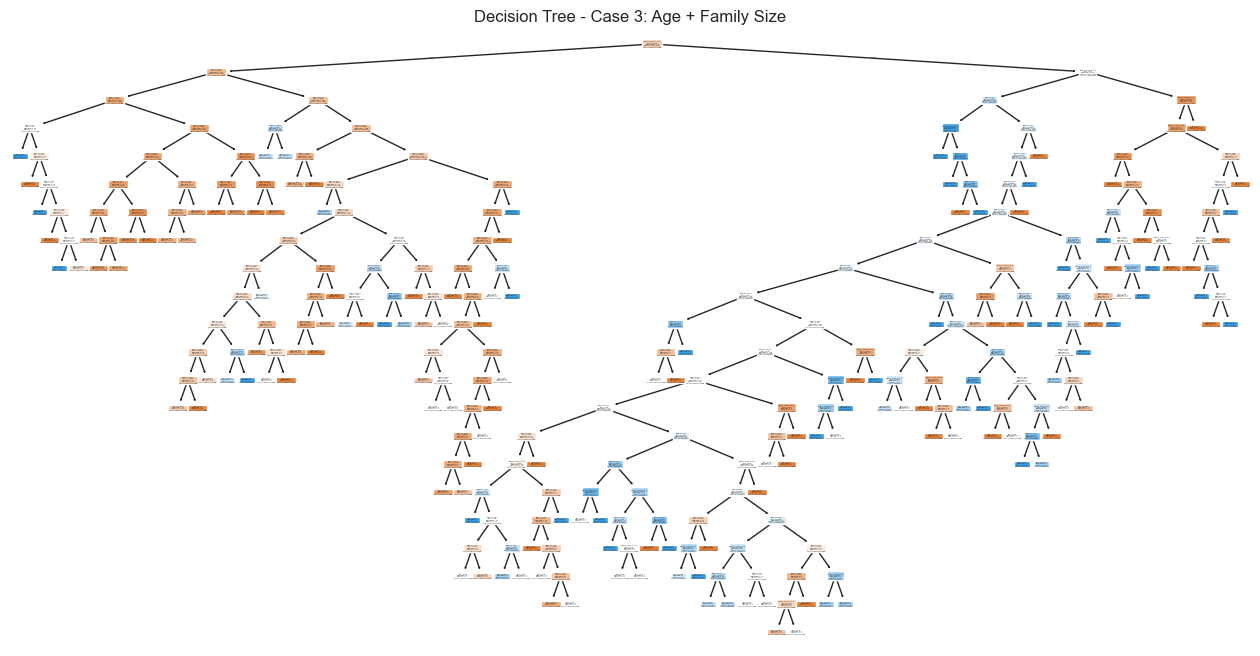

In [88]:
# Plot Decision Tree for Case 3
fig = plt.figure(figsize=(16, 8))
plot_tree(tree_model3,
          feature_names=X3.columns,
          class_names=['Not Survived', 'Survived'],
          filled=True)
plt.title("Decision Tree - Case 3: Age + Family Size")
plt.show()

# Save image
fig.savefig("tree_case3_age_family.png")

### Reflection 4
- How well did the different cases perform? (Discuss using above results)
  All three Decision Tree models achieved moderate accuracy overall.

    - Case 1 (alone): Accuracy ≈ 0.63 — performed reasonably well with a balance between precision and recall.

    - Case 2 (age): Accuracy dropped slightly (≈ 0.61), with poor recall for survivors, suggesting that age alone is not a strong predictor.

    - Case 3 (age + family_size): Highest training accuracy (0.77) but slightly lower test accuracy (0.59), indicating some overfitting when adding more features.
- Any surprising results?
  Yes — adding more features did not consistently improve test performance. Despite stronger training accuracy in Case 3, the generalization dropped, showing that more complexity can hurt model robustness.

- Which inputs worked better?
  The “alone” feature (Case 1) provided the most balanced and generalizable results. It captured a meaningful social survival factor without overfitting, making it the most effective single predictor among the tested cases.

## 5. Compare Alternative Models — SVC (RBF) and Neural Network (MLP)
Train SVC for each case and visualize support vectors. Train MLP for Case 3 and visualize decision surface.

### 5.1 Train SVC (RBF)

In [89]:
# CASE 1: SVC using 'alone'
svc_model1 = SVC()
svc_model1.fit(X1_train, y1_train)
y1_svc_pred = svc_model1.predict(X1_test)
print("Results for SVC on test data (Case 1 - alone):")
print(classification_report(y1_test, y1_svc_pred))

Results for SVC on test data (Case 1 - alone):
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



In [90]:
# CASE 2: SVC using 'Age'
svc_model2 = SVC()
svc_model2.fit(X2_train, y2_train)
y2_svc_pred = svc_model2.predict(X2_test)
print("Results for SVC on test data (Case 2: Age):")
print(classification_report(y2_test, y2_svc_pred))

Results for SVC on test data (Case 2: Age):
              precision    recall  f1-score   support

           0       0.63      0.98      0.77       110
           1       0.71      0.07      0.13        69

    accuracy                           0.63       179
   macro avg       0.67      0.53      0.45       179
weighted avg       0.66      0.63      0.52       179



In [91]:
# Case 3: SVC using 'Age + Family Size'
svc_model3 = SVC()
svc_model3.fit(X3_train, y3_train)
y3_svc_pred = svc_model3.predict(X3_test)
print("Results for SVC on test data (Case 3: Age + Family Size):")
print(classification_report(y3_test, y3_svc_pred))

Results for SVC on test data (Case 3: Age + Family Size):
              precision    recall  f1-score   support

           0       0.63      0.98      0.77       110
           1       0.71      0.07      0.13        69

    accuracy                           0.63       179
   macro avg       0.67      0.53      0.45       179
weighted avg       0.66      0.63      0.52       179



### 5.2 Visualize Support Vectors

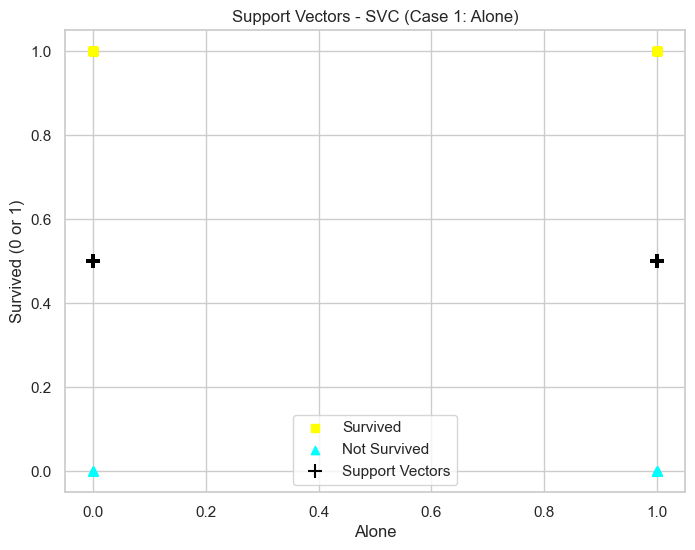

In [92]:
# Visualize support vectors for Case 1 (feature = 'alone')

# Create groups based on survival
survived_alone = X1_test.loc[y1_test == 1, 'alone']
not_survived_alone = X1_test.loc[y1_test == 0, 'alone']

# Create scatter plot for survived and not survived
plt.figure(figsize=(8, 6))

plt.scatter(survived_alone, y1_test.loc[y1_test == 1], c='yellow', marker='s', label='Survived')
plt.scatter(not_survived_alone, y1_test.loc[y1_test == 0], c='cyan', marker='^', label='Not Survived')

# Overlay support vectors
# Check if the model has support_vectors_ (it may not if it failed to converge)
if hasattr(svc_model1, 'support_vectors_'):
    # Get the X-values of the support vectors (only one feature in Case 1
    support_x = svc_model1.support_vectors_[:, 0]  # First feature (alone)
    # Plot them using a fixed Y-value (0.5) to place them between classes visually
    # We use a larger size (s=100) and a plus symbol to make them stand out
    plt.scatter(support_x, [0.5] * len(support_x), c='black', marker='+', s=100, label='Support Vectors')

# Add labels and legend
plt.xlabel('Alone')
plt.ylabel('Survived (0 or 1)')
plt.title('Support Vectors - SVC (Case 1: Alone)')
plt.legend()
plt.grid(True)
plt.show()

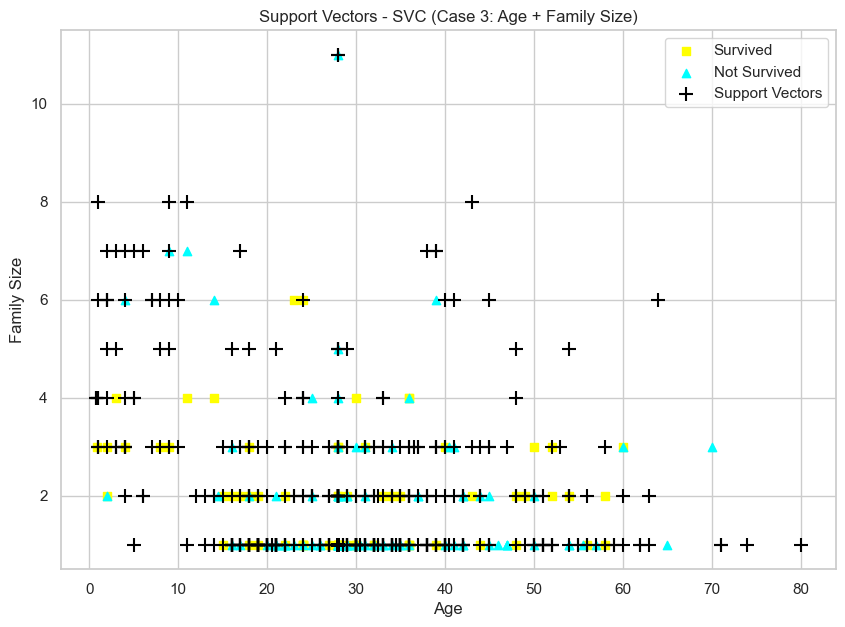

In [93]:
# Visualize support vectors for Case 3 (features = 'age', 'family_size') - more interesting (two dimensional)

# Create groups based on survival
survived = X3_test[y3_test == 1]
not_survived = X3_test[y3_test == 0]

# Create scatter plot
plt.figure(figsize=(10, 7))

# Plot survived (yellow squares)
plt.scatter(survived['age'], survived['family_size'],
            c='yellow', marker='s', label='Survived')

# Plot not survived (cyan triangles)
plt.scatter(not_survived['age'], not_survived['family_size'],
            c='cyan', marker='^', label='Not Survived')

# Overlay support vectors
if hasattr(svc_model3, 'support_vectors_'):
    support_vectors = svc_model3.support_vectors_
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
                c='black', marker='+', s=100, label='Support Vectors')

# Add labels, title, and legend
plt.xlabel('Age')
plt.ylabel('Family Size')
plt.title('Support Vectors - SVC (Case 3: Age + Family Size)')
plt.legend()
plt.grid(True)
plt.show()

### 5.3 Neural Network

In [94]:
# Train NN for Case 3 (age + family_size)
nn_model3 = MLPClassifier(
    hidden_layer_sizes=(50, 25, 10),
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)

nn_model3.fit(X3_train, y3_train)

,hidden_layer_sizes,"(50, ...)"
,activation,'relu'
,solver,'lbfgs'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,1000
,shuffle,True
,random_state,42


#### Predict and evaluate Neural Network model:

In [95]:
# Predict on test data (Case 3)
y3_nn_pred = nn_model3.predict(X3_test)

# Print classification report
print("Results for Neural Network on test data (Case 3 - age + family_size):")
print(classification_report(y3_test, y3_nn_pred))

Results for Neural Network on test data (Case 3 - age + family_size):
              precision    recall  f1-score   support

           0       0.70      0.78      0.74       110
           1       0.57      0.46      0.51        69

    accuracy                           0.66       179
   macro avg       0.64      0.62      0.63       179
weighted avg       0.65      0.66      0.65       179



#### Plot confusion matrix:

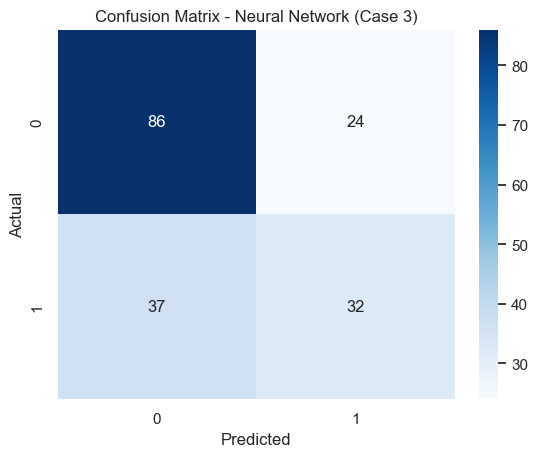

In [96]:
# Create confusion matrix
cm_nn3 = confusion_matrix(y3_test, y3_nn_pred)

# Plot heatmap
sns.heatmap(cm_nn3, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Neural Network (Case 3)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 5.4 Visualize NN Decision Surface

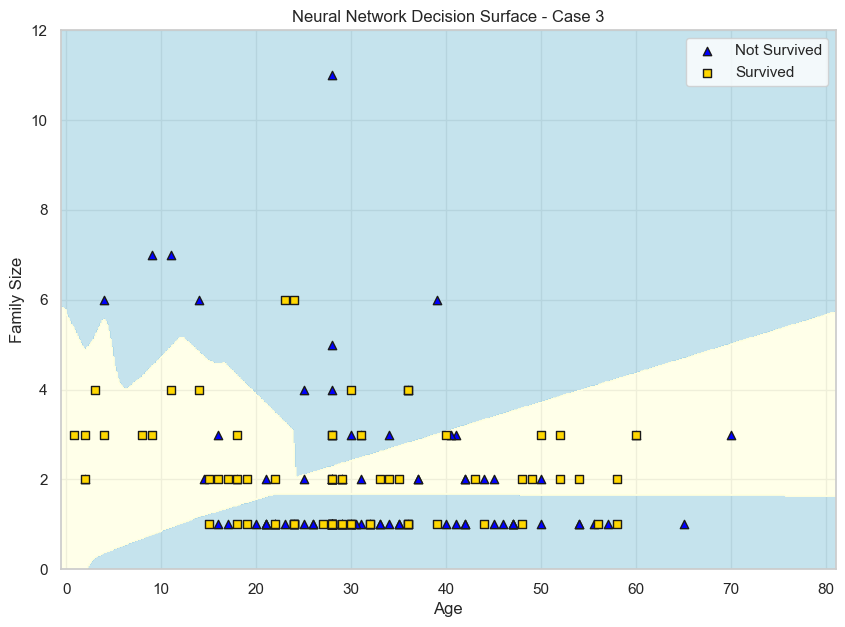

In [97]:
# Get the range of our two features - use padding to enhance appearance

padding = 1
x_min, x_max = X3['age'].min() - padding, X3['age'].max() + padding
y_min, y_max = X3['family_size'].min() - padding, X3['family_size'].max() + padding


# Create a meshgrid (all combinations of age and family_size)

# A grid of values covering the entire input space
# np.linspace(start, stop, num) generates evenly spaced values (like a ruler)
# Here, we create 500 points between min and max for each axis
# np.meshgrid creates a coordinate grid from the two arrays

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                                    np.linspace(y_min, y_max, 500))


# Flatten the grid arrays and prepare them for prediction
# np.c_ stacks the flattened xx and yy into coordinate pairs
# .ravel() flattens a 2D array into 1D (required by the model for prediction)

Z = nn_model3.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the predicted results to match the original 2D grid shape
Z = Z.reshape(xx.shape)

 

# Plot the decision surface (background) showing predicted survival zones
# Blue for 0, yellow for 1 - change this up as you like
plt.figure(figsize=(10, 7))
cmap_background = ListedColormap(['lightblue', 'lightyellow'])

plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.7)



# Overlay the actual test data points for visual comparison
# Plot passengers who did NOT survive (0) as blue triangles
plt.scatter(X3_test['age'][y3_test == 0],
            X3_test['family_size'][y3_test == 0],
            c='blue', marker='^', edgecolor='k', label='Not Survived')

# Plot passengers who DID survive (1) as gold squares
plt.scatter(X3_test['age'][y3_test == 1],
            X3_test['family_size'][y3_test == 1],
            c='gold', marker='s', edgecolor='k', label='Survived')

# Add axis labels, title, legend, and grid
plt.xlabel('Age')
plt.ylabel('Family Size')
plt.title('Neural Network Decision Surface - Case 3')
plt.legend()
plt.grid(True)
plt.show()

### Reflection 5:
- How well did each of these new models/cases perform?
    - **Decision Tree:** Performed moderately well with accuracy ranging between 0.59–0.63 on test data. It captured some patterns but showed slight overfitting when multiple features were used.

    - **SVC (RBF Kernel):** Achieved consistent accuracy around 0.63 across all cases. However, recall for the survivor class (1) was quite low when using age or age + family_size, suggesting the model struggled with class imbalance.

    - **Neural Network (MLP):** Showed slightly better balance with accuracy ≈ 0.66, and both precision and recall were moderately high, indicating it generalized slightly better than the others.
  
- Are there any surprising results or insights?
  Yes — it’s interesting that SVC performed nearly the same in all cases, even when more features were added. This suggests that the additional features did not provide much new predictive information for this dataset. The Neural Network’s slight improvement shows that non-linear models can better capture subtle relationships, but gains remain modest due to limited features.

- Why might one model outperform the others?
  The Neural Network may outperform others because it can model complex, non-linear relationships between features and outcomes, unlike SVC or Decision Trees that depend on explicit boundaries or splits. However, with a small feature set and limited data, its advantage is minor — showing that feature quality and representation matter more than model complexity in this case.


## 6. Summary Table

| Model Type | Case | Features Used | Accuracy | Precision | Recall | F1-Score | Notes |
|------------|------|---------------|----------|-----------|--------|-----------|-------|
| Decision Tree | Case 1 | alone | 62.57% | 51.28% | 57.97% | 54.42% | - |
| Decision Tree | Case 2 | age | 61.45% | 50.00% | 17.39% | 25.81%| - |
| Decision Tree | Case 3 | age+family_size | 59.22% | 46.15% | 34.78%| 39.67% | - |
| SVM (RBF) | Case 1 | alone | 62.57% | 51.28% | 57.97% | 54.42% | - |
| SVM (RBF) | Case 2 | age | 63.13% | 71.43%	 | 7.25% | 13.16% | - |
| SVM (RBF) | Case 3 | age+family_size | 63.13% | 71.43% | 7.25% | 13.16% | - |
| Neural Network | Case 3 | age+family_size | 65.92% | 57.14% | 46.38% | 51.20%| - |

### Reflection 6 - Final Thoughts & Insights
- Summarize which model/case performed best and why.
  The Neural Network (Case 3 – age + family_size) performed the best overall with an accuracy of 65.92% and a balanced trade-off between precision and recall. While Decision Tree and SVM (RBF) models had comparable accuracy (~62–63%), they either overfit (Decision Tree) or struggled with identifying the positive class (SVM’s very low recall).
  The Neural Network’s ability to capture non-linear relationships between features likely contributed to its slightly better generalization performance, even though the feature set was small.

- Discuss challenges and next steps (hyperparameter tuning, feature additions, ensembles).
  One major challenge was class imbalance, as the model tended to favor predicting the majority (non-survivor) class. Additionally, limited features such as only alone, age, and family_size restricted the models’ predictive power. The small increase in performance across cases suggests that the dataset may require more informative variables for meaningful improvement.

  Next steps for improvement:

  - **Hyperparameter tuning:** Adjusting parameters like tree depth, SVM kernel parameters (C, gamma), and neural network learning rate or hidden layer size could further optimize performance.

  - **Feature engineering:** Including variables like sex, class, and fare could significantly enhance model accuracy, as these are highly correlated with survival in the Titanic dataset.

  - **Model ensembles:** Techniques such as Random Forest, Gradient Boosting, or Voting Classifiers could help combine model strengths and reduce bias-variance trade-offs.

  - **Cross-validation:** Employing k-fold validation would provide a more robust estimate of model performance and prevent overfitting.


## 7. Bonus Section
Try same workflow on Iris dataset.

In [98]:
# Bonus: Iris dataset
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
X_iris = iris.data; y_iris = iris.target
Xtr,Xte,ytr,yte = train_test_split(X_iris,y_iris,test_size=0.2,stratify=y_iris,random_state=42)

iris_tree = DecisionTreeClassifier(random_state=42).fit(Xtr,ytr)
iris_svc = SVC().fit(Xtr,ytr)
iris_nn = MLPClassifier(hidden_layer_sizes=(50,25), solver='lbfgs', max_iter=1000, random_state=42).fit(Xtr,ytr)

print('Iris - Decision Tree:\n', classification_report(yte, iris_tree.predict(Xte)))
print('Iris - SVC:\n', classification_report(yte, iris_svc.predict(Xte)))
print('Iris - Neural Network:\n', classification_report(yte, iris_nn.predict(Xte)))

Iris - Decision Tree:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Iris - SVC:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Iris - Neural Network:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2   